In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool, cv
from lightgbm import LGBMRegressor

In [4]:
train = pd.read_csv(r'C:\Users\telmu\Desktop\PythonJupyterNotebook\Datasets\advanced regression\train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
tests = pd.read_csv(r'C:\Users\telmu\Desktop\PythonJupyterNotebook\Datasets\advanced regression\test.csv')
tests.shape

(1459, 80)

In [6]:
train,test = train.drop('Id',axis=1),tests.drop('Id',axis=1)

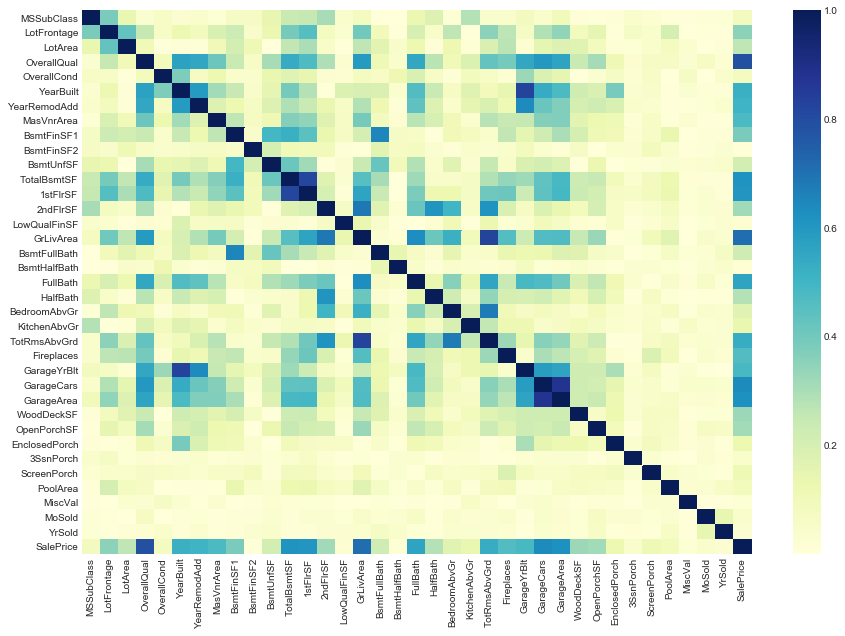

In [7]:
corr = train.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(abs(corr),cmap="YlGnBu")

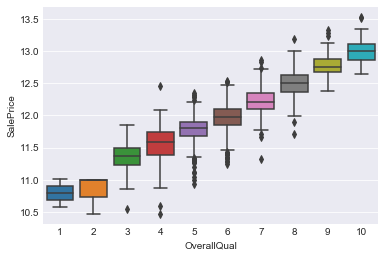

In [33]:
sns.boxplot(x=train['OverallQual'],y=train['SalePrice'])

Text(0.5, 0, 'GrLivArea')

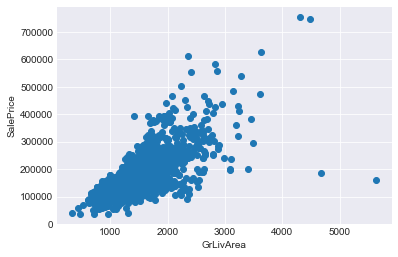

In [8]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')

In [7]:
train = train.drop(train[(train['GrLivArea']>3500) & (train['SalePrice']<200000)].index).reset_index(drop=True)

In [8]:
train.shape

(1458, 80)

Text(0, 0.5, 'SalePrice')

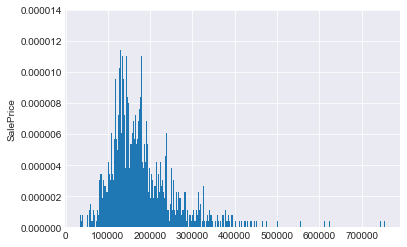

In [11]:
plt.hist(train['SalePrice'], normed=True,bins=400)
plt.ylabel('SalePrice')

In [9]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [10]:
x_train = train.drop('SalePrice',axis='columns')
y_train = train.loc[:,'SalePrice']

In [11]:
X = pd.concat([x_train,test],ignore_index=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [12]:
(X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)

PoolQC         0.996915
MiscFeature    0.964004
Alley          0.932122
Fence          0.804251
FireplaceQu    0.486802
                 ...   
1stFlrSF       0.000000
CentralAir     0.000000
Heating        0.000000
Foundation     0.000000
MSSubClass     0.000000
Length: 79, dtype: float64

In [13]:
cat_values = ['FireplaceQu','Alley','PoolQC','MiscFeature','Fence','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
X_cat = X.loc[:,cat_values]
X_num = X.drop(cat_values,axis='columns')

In [14]:
X_cat['Alley'] = X_cat['Alley'].fillna('NA')
X_cat['FireplaceQu'] = X_cat['FireplaceQu'].fillna('NA')
X_cat['PoolQC'] = X_cat['PoolQC'].fillna('NA')
X_cat['MiscFeature'] = X_cat['MiscFeature'].fillna('NA')
X_cat['Fence'] = X_cat['Fence'].fillna('NA')

In [15]:
for i in range(len(X_cat.columns)):
    X_cat[X_cat.columns[i]] = X_cat[X_cat.columns[i]].fillna(X_cat[X_cat.columns[i]].value_counts().index[0])

In [16]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FireplaceQu    2917 non-null   object
 1   Alley          2917 non-null   object
 2   PoolQC         2917 non-null   object
 3   MiscFeature    2917 non-null   object
 4   Fence          2917 non-null   object
 5   MSZoning       2917 non-null   object
 6   Street         2917 non-null   object
 7   LotShape       2917 non-null   object
 8   LandContour    2917 non-null   object
 9   Utilities      2917 non-null   object
 10  LotConfig      2917 non-null   object
 11  LandSlope      2917 non-null   object
 12  Neighborhood   2917 non-null   object
 13  Condition1     2917 non-null   object
 14  Condition2     2917 non-null   object
 15  BldgType       2917 non-null   object
 16  HouseStyle     2917 non-null   object
 17  RoofStyle      2917 non-null   object
 18  RoofMatl       2917 non-null

In [17]:
for i in range(len(X_num.columns)):
    X_num[X_num.columns[i]] = X_num[X_num.columns[i]].fillna(X_num[X_num.columns[i]].median())

In [18]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   LotFrontage    2917 non-null   float64
 2   LotArea        2917 non-null   int64  
 3   OverallQual    2917 non-null   int64  
 4   OverallCond    2917 non-null   int64  
 5   YearBuilt      2917 non-null   int64  
 6   YearRemodAdd   2917 non-null   int64  
 7   MasVnrArea     2917 non-null   float64
 8   BsmtFinSF1     2917 non-null   float64
 9   BsmtFinSF2     2917 non-null   float64
 10  BsmtUnfSF      2917 non-null   float64
 11  TotalBsmtSF    2917 non-null   float64
 12  1stFlrSF       2917 non-null   int64  
 13  2ndFlrSF       2917 non-null   int64  
 14  LowQualFinSF   2917 non-null   int64  
 15  GrLivArea      2917 non-null   int64  
 16  BsmtFullBath   2917 non-null   float64
 17  BsmtHalfBath   2917 non-null   float64
 18  FullBath

In [19]:
X_ctb = X_dt = pd.merge(X_num,X_cat,left_index=True, right_index=True)
X_ctb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   LotFrontage    2917 non-null   float64
 2   LotArea        2917 non-null   int64  
 3   OverallQual    2917 non-null   int64  
 4   OverallCond    2917 non-null   int64  
 5   YearBuilt      2917 non-null   int64  
 6   YearRemodAdd   2917 non-null   int64  
 7   MasVnrArea     2917 non-null   float64
 8   BsmtFinSF1     2917 non-null   float64
 9   BsmtFinSF2     2917 non-null   float64
 10  BsmtUnfSF      2917 non-null   float64
 11  TotalBsmtSF    2917 non-null   float64
 12  1stFlrSF       2917 non-null   int64  
 13  2ndFlrSF       2917 non-null   int64  
 14  LowQualFinSF   2917 non-null   int64  
 15  GrLivArea      2917 non-null   int64  
 16  BsmtFullBath   2917 non-null   float64
 17  BsmtHalfBath   2917 non-null   float64
 18  FullBath

In [38]:
X_cat_encoded = pd.get_dummies(X_cat)
X_cat_encoded.head()

,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,Alley_Grvl,Alley_NA,Alley_Pave,PoolQC_Ex,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
X_cat_encoded = X_cat_encoded.drop(['FireplaceQu_NA','Alley_NA','PoolQC_NA','MiscFeature_NA','Fence_NA'],axis=1)

In [40]:
num_col = list(X_num.columns)
scaler = StandardScaler()
scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(scaled,columns=num_col)

In [41]:
X_dt = pd.merge(X_num_scaled,X_cat_encoded,left_index=True, right_index=True)
X_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 287 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(36), uint8(251)
memory usage: 1.5 MB


In [20]:
X_train = X_ctb.iloc[:1458]
X_val = X_dt.iloc[1100:1458]
X_test = X_ctb.iloc[1458:].reset_index().drop('index',axis='columns')

In [43]:
#y_train,y_val=y_train.iloc[:1100],y_train.iloc[1100:]

# Modeling

In [137]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error
def rmsle(predicted, actual):
    return np.sqrt(mean_squared_log_error(actual,predicted))
scorer = make_scorer(rmsle, greater_is_better=False)

In [154]:
lasso = Lasso()
lasso.fit(X_train,y_train)
cross_val_score(lasso,X_train,y_train,cv=3,scoring="neg_mean_squared_error",n_jobs=-1).mean()

-0.16413565042004133

In [155]:
param_grid = [
 
{'alpha':[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]},
 
]
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True,n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.05}

In [41]:
lasso2 = Lasso(alpha=0.05)
lasso2.fit(X_train,y_train)
cross_val_score(lasso2,X_train,y_train,cv=3,scoring="neg_mean_squared_error",n_jobs=-1).mean()

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [143]:
param_grid = [
 
{'n_estimators': [60,100,150], 'max_features': [50,100,200],'max_leaf_nodes':[16,32,64,128],'min_samples_leaf':[2,4,6,8]},
 
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True,n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_features': 200,
 'max_leaf_nodes': 128,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [56]:
forest = RandomForestRegressor(max_features=200,n_estimators=100,max_leaf_nodes=128,min_samples_leaf=2)
forest.fit(X_train,y_train)
cross_val_score(forest,X_train, y_train, cv=3,scoring="neg_mean_squared_error").mean()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=200, max_leaf_nodes=128,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
names = X_dt.columns
importance = forest.feature_importances_
sorted(zip(map(lambda x: round(x, 7), importance), names), reverse=True)

[(0.4796344, 'OverallQual'),
 (0.1408388, 'GrLivArea'),
 (0.0443798, 'YearBuilt'),
 (0.0441766, 'TotalBsmtSF'),
 (0.0357015, 'GarageCars'),
 (0.030623, 'GarageArea'),
 (0.0301044, '1stFlrSF'),
 (0.0219787, 'BsmtFinSF1'),
 (0.0129851, 'ExterQual_TA'),
 (0.0116081, 'LotArea'),
 (0.0101947, 'OverallCond'),
 (0.0092604, 'GarageFinish_Unf'),
 (0.0079858, 'YearRemodAdd'),
 (0.0075778, 'Fireplaces'),
 (0.0070167, 'GarageYrBlt'),
 (0.0067313, '2ndFlrSF'),
 (0.0063684, 'CentralAir_Y'),
 (0.0050017, 'CentralAir_N'),
 (0.0047276, 'LotFrontage'),
 (0.0042312, 'BsmtUnfSF'),
 (0.0039723, 'MSZoning_RM'),
 (0.0038645, 'TotRmsAbvGrd'),
 (0.0036852, 'FullBath'),
 (0.0034771, 'GarageType_Detchd'),
 (0.0028559, 'BsmtQual_Ex'),
 (0.002713, 'MSZoning_C (all)'),
 (0.0026485, 'OpenPorchSF'),
 (0.0022372, 'WoodDeckSF'),
 (0.0020599, 'MasVnrArea'),
 (0.0018308, 'KitchenAbvGr'),
 (0.0018181, 'MoSold'),
 (0.0016625, 'MSSubClass'),
 (0.0014131, 'BsmtFinType1_Unf'),
 (0.0013701, 'MSZoning_RL'),
 (0.0012937, 'BsmtQu

In [163]:
param_grid = [
 
{'n_estimators': [500,700,1000],'max_depth':[2,4,8],'min_child_weight':[0,1,5,15]},
 
]
xgb = XGBRegressor(learning_rate=0.01)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True,n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

[21:36:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'max_depth': 8, 'min_child_weight': 15, 'n_estimators': 1000}

In [46]:
xgb2 = XGBRegressor(objective ='reg:squarederror',n_estimators=1000, learning_rate=0.01,max_depth=8,min_child_weight=15)
xgb2.fit(X_train, y_train)
cross_val_score(xgb2,X_train,y_train,cv=3,scoring="neg_mean_squared_error",n_jobs=-1).mean()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=15, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [53]:
names = X_dt.columns
importance = xgb2.feature_importances_
sorted(zip(map(lambda x: round(x, 7), importance), names), reverse=True)

[(0.1449674, 'GarageCars'),
 (0.1083144, 'BsmtQual_Ex'),
 (0.0672671, 'GarageFinish_Unf'),
 (0.0661909, 'Fireplaces'),
 (0.0552506, 'KitchenQual_Ex'),
 (0.0357647, 'OverallQual'),
 (0.0319285, 'TotalBsmtSF'),
 (0.031502, 'GrLivArea'),
 (0.0289897, 'CentralAir_N'),
 (0.0231295, 'MSZoning_RL'),
 (0.0196703, 'YearRemodAdd'),
 (0.0182204, 'KitchenQual_Gd'),
 (0.0155524, 'YearBuilt'),
 (0.0136302, 'PavedDrive_N'),
 (0.0125331, 'BsmtFinType1_GLQ'),
 (0.0101984, 'ExterCond_Fa'),
 (0.0097931, 'BsmtExposure_Gd'),
 (0.0089528, 'OverallCond'),
 (0.0086303, 'BsmtFinSF1'),
 (0.0086117, 'KitchenAbvGr'),
 (0.0080473, 'SaleCondition_Abnorml'),
 (0.0073225, 'BsmtCond_TA'),
 (0.0068274, 'LotArea'),
 (0.0066288, 'GarageArea'),
 (0.0063622, 'Neighborhood_Crawfor'),
 (0.0063298, 'MSZoning_RM'),
 (0.0060212, 'Neighborhood_OldTown'),
 (0.0055505, 'PavedDrive_Y'),
 (0.0048843, 'BsmtFullBath'),
 (0.0047486, 'Neighborhood_IDOTRR'),
 (0.0044185, '1stFlrSF'),
 (0.0043971, 'MiscVal'),
 (0.0043498, 'Functional_Typ'

In [22]:
categorical_features_indices=np.where(X_train.dtypes == np.object)[0]

In [23]:
ctb2 = CatBoostRegressor(learning_rate=0.1,random_state=42,iterations=1000,depth=4,random_strength=1)
ctb2.fit(X_train,y_train,cat_features=categorical_features_indices,verbose=True)

0:	learn: 0.3746082	total: 160ms	remaining: 2m 39s
1:	learn: 0.3517257	total: 217ms	remaining: 1m 48s
2:	learn: 0.3322699	total: 268ms	remaining: 1m 29s
3:	learn: 0.3136465	total: 315ms	remaining: 1m 18s
4:	learn: 0.2974707	total: 375ms	remaining: 1m 14s
5:	learn: 0.2837825	total: 417ms	remaining: 1m 9s
6:	learn: 0.2717582	total: 464ms	remaining: 1m 5s
7:	learn: 0.2589632	total: 509ms	remaining: 1m 3s
8:	learn: 0.2475820	total: 547ms	remaining: 1m
9:	learn: 0.2362215	total: 584ms	remaining: 57.8s
10:	learn: 0.2264557	total: 622ms	remaining: 56s
11:	learn: 0.2178850	total: 664ms	remaining: 54.6s
12:	learn: 0.2108823	total: 696ms	remaining: 52.8s
13:	learn: 0.2046509	total: 728ms	remaining: 51.2s
14:	learn: 0.1990001	total: 758ms	remaining: 49.8s
15:	learn: 0.1926899	total: 792ms	remaining: 48.7s
16:	learn: 0.1869959	total: 830ms	remaining: 48s
17:	learn: 0.1819519	total: 867ms	remaining: 47.3s
18:	learn: 0.1775431	total: 903ms	remaining: 46.6s
19:	learn: 0.1732890	total: 934ms	remaining

161:	learn: 0.0975031	total: 7.24s	remaining: 37.4s
162:	learn: 0.0974624	total: 7.28s	remaining: 37.4s
163:	learn: 0.0974172	total: 7.32s	remaining: 37.3s
164:	learn: 0.0972615	total: 7.36s	remaining: 37.2s
165:	learn: 0.0970788	total: 7.4s	remaining: 37.2s
166:	learn: 0.0970762	total: 7.44s	remaining: 37.1s
167:	learn: 0.0968491	total: 7.47s	remaining: 37s
168:	learn: 0.0967980	total: 7.51s	remaining: 36.9s
169:	learn: 0.0967564	total: 7.55s	remaining: 36.9s
170:	learn: 0.0967289	total: 7.58s	remaining: 36.8s
171:	learn: 0.0967287	total: 7.62s	remaining: 36.7s
172:	learn: 0.0965963	total: 7.66s	remaining: 36.6s
173:	learn: 0.0965394	total: 7.7s	remaining: 36.6s
174:	learn: 0.0965038	total: 7.73s	remaining: 36.5s
175:	learn: 0.0961775	total: 7.77s	remaining: 36.4s
176:	learn: 0.0960919	total: 7.8s	remaining: 36.3s
177:	learn: 0.0957306	total: 7.84s	remaining: 36.2s
178:	learn: 0.0956446	total: 7.88s	remaining: 36.1s
179:	learn: 0.0954424	total: 7.92s	remaining: 36.1s
180:	learn: 0.095

324:	learn: 0.0838796	total: 13.6s	remaining: 28.2s
325:	learn: 0.0838302	total: 13.6s	remaining: 28.1s
326:	learn: 0.0838100	total: 13.6s	remaining: 28.1s
327:	learn: 0.0837859	total: 13.7s	remaining: 28s
328:	learn: 0.0837346	total: 13.7s	remaining: 28s
329:	learn: 0.0836833	total: 13.8s	remaining: 27.9s
330:	learn: 0.0836832	total: 13.8s	remaining: 27.9s
331:	learn: 0.0835983	total: 13.8s	remaining: 27.8s
332:	learn: 0.0835156	total: 13.9s	remaining: 27.8s
333:	learn: 0.0834010	total: 13.9s	remaining: 27.7s
334:	learn: 0.0833231	total: 13.9s	remaining: 27.7s
335:	learn: 0.0832667	total: 14s	remaining: 27.6s
336:	learn: 0.0831871	total: 14s	remaining: 27.6s
337:	learn: 0.0831446	total: 14s	remaining: 27.5s
338:	learn: 0.0830893	total: 14.1s	remaining: 27.5s
339:	learn: 0.0830507	total: 14.1s	remaining: 27.4s
340:	learn: 0.0829840	total: 14.2s	remaining: 27.4s
341:	learn: 0.0829107	total: 14.2s	remaining: 27.3s
342:	learn: 0.0828979	total: 14.2s	remaining: 27.3s
343:	learn: 0.0827868	

485:	learn: 0.0729533	total: 20.3s	remaining: 21.5s
486:	learn: 0.0729144	total: 20.4s	remaining: 21.5s
487:	learn: 0.0728387	total: 20.5s	remaining: 21.5s
488:	learn: 0.0727458	total: 20.5s	remaining: 21.4s
489:	learn: 0.0726394	total: 20.6s	remaining: 21.4s
490:	learn: 0.0726133	total: 20.6s	remaining: 21.4s
491:	learn: 0.0724343	total: 20.7s	remaining: 21.4s
492:	learn: 0.0723381	total: 20.8s	remaining: 21.4s
493:	learn: 0.0722241	total: 20.8s	remaining: 21.3s
494:	learn: 0.0721473	total: 20.9s	remaining: 21.3s
495:	learn: 0.0720610	total: 21s	remaining: 21.3s
496:	learn: 0.0719748	total: 21s	remaining: 21.3s
497:	learn: 0.0718143	total: 21.1s	remaining: 21.3s
498:	learn: 0.0716748	total: 21.1s	remaining: 21.2s
499:	learn: 0.0715652	total: 21.2s	remaining: 21.2s
500:	learn: 0.0714681	total: 21.3s	remaining: 21.2s
501:	learn: 0.0714641	total: 21.3s	remaining: 21.1s
502:	learn: 0.0713778	total: 21.4s	remaining: 21.1s
503:	learn: 0.0713563	total: 21.4s	remaining: 21.1s
504:	learn: 0.07

649:	learn: 0.0630581	total: 27.3s	remaining: 14.7s
650:	learn: 0.0630532	total: 27.4s	remaining: 14.7s
651:	learn: 0.0630069	total: 27.4s	remaining: 14.6s
652:	learn: 0.0629724	total: 27.4s	remaining: 14.6s
653:	learn: 0.0628860	total: 27.5s	remaining: 14.5s
654:	learn: 0.0628767	total: 27.5s	remaining: 14.5s
655:	learn: 0.0628124	total: 27.5s	remaining: 14.4s
656:	learn: 0.0627011	total: 27.6s	remaining: 14.4s
657:	learn: 0.0626804	total: 27.6s	remaining: 14.4s
658:	learn: 0.0626478	total: 27.7s	remaining: 14.3s
659:	learn: 0.0625927	total: 27.7s	remaining: 14.3s
660:	learn: 0.0625877	total: 27.7s	remaining: 14.2s
661:	learn: 0.0625139	total: 27.8s	remaining: 14.2s
662:	learn: 0.0624430	total: 27.8s	remaining: 14.1s
663:	learn: 0.0624380	total: 27.8s	remaining: 14.1s
664:	learn: 0.0624252	total: 27.9s	remaining: 14s
665:	learn: 0.0623480	total: 27.9s	remaining: 14s
666:	learn: 0.0622481	total: 27.9s	remaining: 13.9s
667:	learn: 0.0622017	total: 28s	remaining: 13.9s
668:	learn: 0.0621

809:	learn: 0.0568860	total: 34.7s	remaining: 8.15s
810:	learn: 0.0568587	total: 34.8s	remaining: 8.11s
811:	learn: 0.0568478	total: 34.8s	remaining: 8.07s
812:	learn: 0.0568059	total: 34.9s	remaining: 8.03s
813:	learn: 0.0567657	total: 35s	remaining: 7.99s
814:	learn: 0.0567385	total: 35s	remaining: 7.95s
815:	learn: 0.0567256	total: 35.1s	remaining: 7.91s
816:	learn: 0.0566352	total: 35.1s	remaining: 7.87s
817:	learn: 0.0566201	total: 35.2s	remaining: 7.83s
818:	learn: 0.0566027	total: 35.3s	remaining: 7.79s
819:	learn: 0.0565823	total: 35.3s	remaining: 7.75s
820:	learn: 0.0565780	total: 35.4s	remaining: 7.71s
821:	learn: 0.0565376	total: 35.4s	remaining: 7.67s
822:	learn: 0.0565157	total: 35.5s	remaining: 7.63s
823:	learn: 0.0565094	total: 35.6s	remaining: 7.59s
824:	learn: 0.0564874	total: 35.6s	remaining: 7.55s
825:	learn: 0.0564177	total: 35.7s	remaining: 7.51s
826:	learn: 0.0563426	total: 35.7s	remaining: 7.47s
827:	learn: 0.0563133	total: 35.8s	remaining: 7.43s
828:	learn: 0.05

968:	learn: 0.0524433	total: 43.8s	remaining: 1.4s
969:	learn: 0.0523813	total: 43.9s	remaining: 1.36s
970:	learn: 0.0523011	total: 44s	remaining: 1.31s
971:	learn: 0.0522990	total: 44s	remaining: 1.27s
972:	learn: 0.0522750	total: 44.1s	remaining: 1.22s
973:	learn: 0.0522463	total: 44.1s	remaining: 1.18s
974:	learn: 0.0522384	total: 44.2s	remaining: 1.13s
975:	learn: 0.0522066	total: 44.2s	remaining: 1.09s
976:	learn: 0.0521980	total: 44.2s	remaining: 1.04s
977:	learn: 0.0521964	total: 44.3s	remaining: 996ms
978:	learn: 0.0521553	total: 44.3s	remaining: 950ms
979:	learn: 0.0520847	total: 44.3s	remaining: 905ms
980:	learn: 0.0520491	total: 44.4s	remaining: 859ms
981:	learn: 0.0520213	total: 44.4s	remaining: 814ms
982:	learn: 0.0520174	total: 44.4s	remaining: 769ms
983:	learn: 0.0520042	total: 44.5s	remaining: 723ms
984:	learn: 0.0519968	total: 44.5s	remaining: 678ms
985:	learn: 0.0519525	total: 44.5s	remaining: 633ms
986:	learn: 0.0519265	total: 44.6s	remaining: 587ms
987:	learn: 0.051

In [70]:
names = X_ctb.columns
importance = ctb2.get_feature_importance(type='FeatureImportance')
features = sorted(zip(map(lambda x: round(x,5),importance),names),reverse=True)
features

[(20.20271, 'OverallQual'),
 (15.68027, 'GrLivArea'),
 (6.52438, 'TotalBsmtSF'),
 (4.32106, '1stFlrSF'),
 (4.23852, 'Fireplaces'),
 (4.01911, 'KitchenQual'),
 (3.36792, 'BsmtFinSF1'),
 (3.19897, 'YearBuilt'),
 (3.04885, 'OverallCond'),
 (3.02659, 'GarageArea'),
 (2.96765, 'GarageCars'),
 (2.91974, 'CentralAir'),
 (2.64664, 'GarageFinish'),
 (2.60119, 'LotArea'),
 (1.89567, 'YearRemodAdd'),
 (1.77699, 'MSZoning'),
 (1.58407, 'FullBath'),
 (1.48984, 'HalfBath'),
 (1.18844, '2ndFlrSF'),
 (1.02243, 'SaleCondition'),
 (1.01578, 'Neighborhood'),
 (0.99715, 'LotFrontage'),
 (0.806, 'GarageYrBlt'),
 (0.7544, 'BsmtQual'),
 (0.67369, 'TotRmsAbvGrd'),
 (0.52399, 'BsmtExposure'),
 (0.43636, 'WoodDeckSF'),
 (0.43301, 'BsmtFullBath'),
 (0.43034, 'OpenPorchSF'),
 (0.42783, 'Condition1'),
 (0.38431, 'BsmtUnfSF'),
 (0.33347, 'Functional'),
 (0.3103, 'YrSold'),
 (0.26378, 'PavedDrive'),
 (0.25967, 'LotShape'),
 (0.23404, 'ScreenPorch'),
 (0.21974, 'Exterior1st'),
 (0.20432, 'MasVnrArea'),
 (0.19889, 'Ki

In [84]:
important = []
for i in features:
    if i[0]>0.05:
        important.append(i[1])
important
X_ctb_imp = X_ctb.loc[:,important]
X_train_imp = X_ctb_imp.iloc[:1458]
X_test_imp = X_ctb_imp.iloc[1458:].reset_index().drop('index',axis='columns')
categorical_features_indices = np.where(X_train_imp.dtypes == np.object)[0]
ctb2 = CatBoostRegressor(learning_rate=0.1,random_state=42,iterations=1000,depth=4,random_strength=1)
ctb2.fit(X_train_imp,y_train,cat_features=categorical_features_indices,verbose=False)

In [177]:
param_grid = [
 
{'bagging_temperature': [1,3], 'depth':[4,8,12],'random_strength':[1,3,5]},
 
] 
ctb = CatBoostRegressor(learning_rate=0.1,random_state=42,iterations=1000)
grid_search = GridSearchCV(ctb, param_grid,cv=3, return_train_score=True,scoring="RMSE")
grid_search.fit(X_train, y_train,cat_features=categorical_features_indices,verbose=False)
grid_search.best_params_

KeyboardInterrupt: 

In [38]:
ctb2_val = ctb2.predict(X_val)
ctb2_test = ctb2.predict(X_test)

In [60]:
estimators = [lasso2,forest,xgb2,ctb2]
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [61]:
X_val_pred = np.c_[X_val_predictions,ctb2_val]
rnd_forest_blender = RandomForestRegressor(n_estimators=200, random_state=42)
rnd_forest_blender.fit(X_val_pred, y_val)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [62]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [63]:
X_test_pred = np.c_[X_test_predictions,ctb2_test]

In [85]:
tested = np.expm1(ctb2.predict(X_test_imp))
submission = pd.DataFrame({
        "Id": tests["Id"],
        "SalePrice": tested
    })

submission.to_csv("kaggle_HousePrices.csv", index=False)